In [8]:
from google.colab import files

# Upload the files
uploaded = files.upload()


Saving Diwali_sales_data.csv to Diwali_sales_data (1).csv


In [14]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

dataset = pd.read_csv('Diwali_sales_data.csv', encoding= 'unicode-escape')
#use encoding to remove errors

dataset.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [15]:
dataset.shape

(11251, 15)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [22]:
dataset.drop(['Status','unnamed1'], axis=1, inplace = True)

In [32]:
pd.isnull(dataset).sum()

dataset.dropna(inplace= True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [33]:
dataset['Amount'] = dataset['Amount'].astype('int')

# **EDA (Exploratory Data Analysis)**

**Gender**

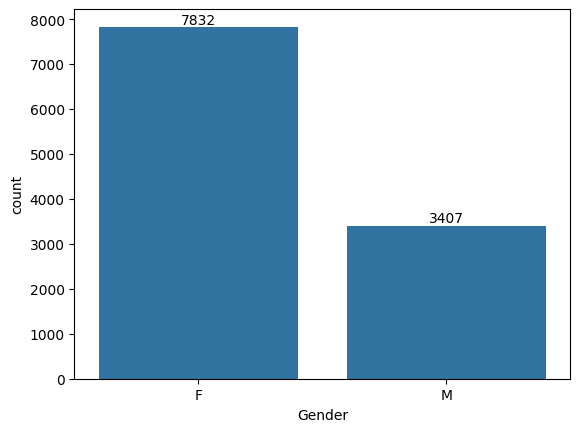

In [37]:
gx = sns.countplot(x = 'Gender', data= dataset)

for bars in gx.containers:
  gx.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

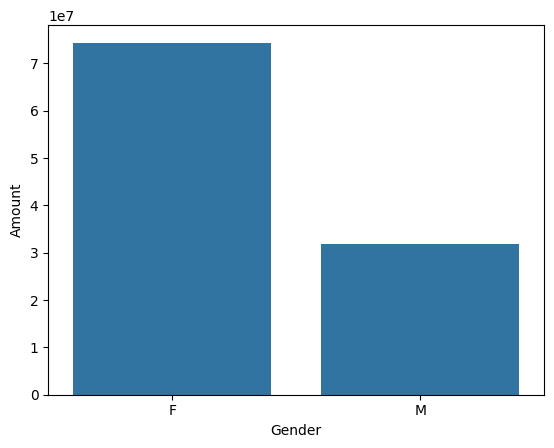

In [52]:
sales_gen = dataset.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Gender', y='Amount', data= sales_gen)

From here we can say that most of the buyers are female.


**Age**

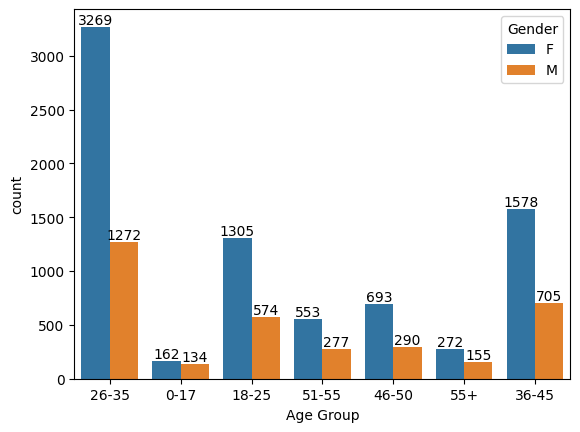

In [49]:
ax = sns.countplot(data = dataset, x='Age Group', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

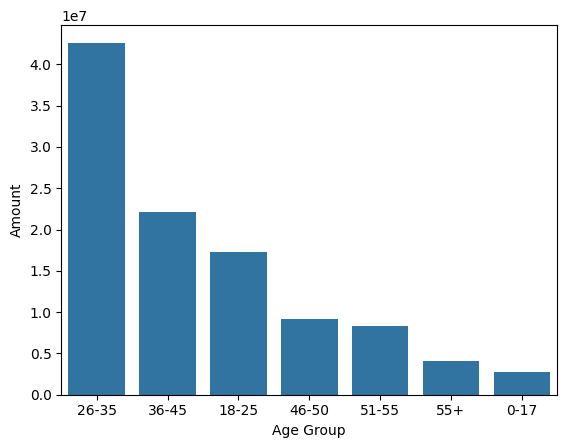

In [53]:
sales_age = dataset.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Age Group', y='Amount', data= sales_age)

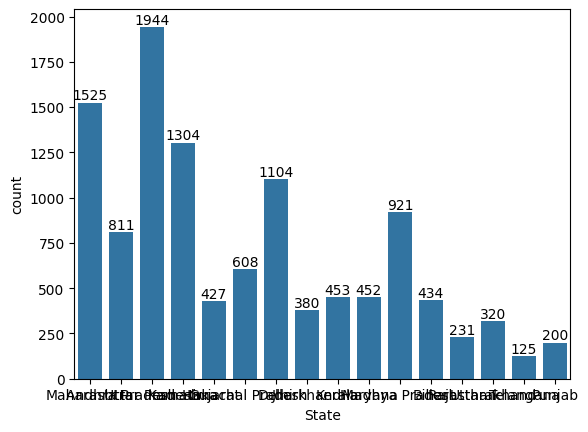

In [59]:
sx = sns.countplot(x = 'State', data= dataset)

for bars in sx.containers:
  sx.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

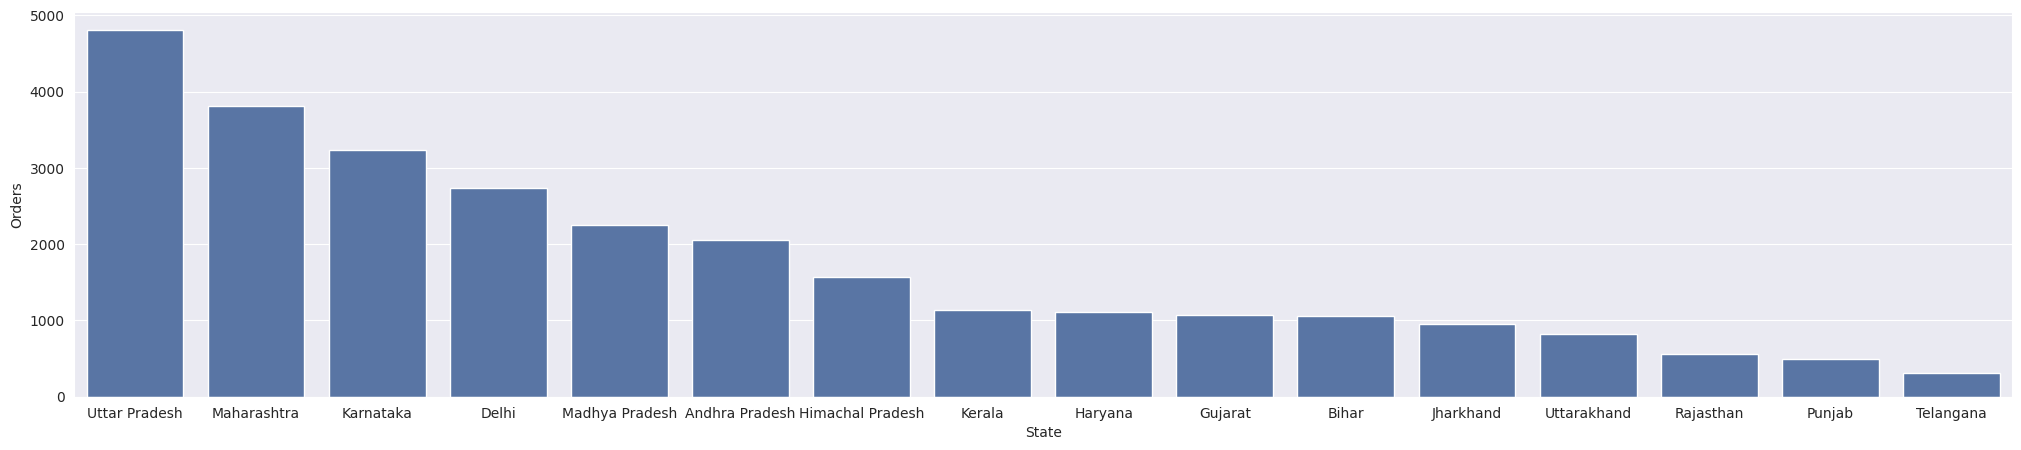

In [66]:
order_state = dataset.groupby(['State'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)
sns.set({'figure.figsize':(25,5)})
sns.barplot(x='State', y='Orders', data= order_state)

<Axes: xlabel='State', ylabel='Amount'>

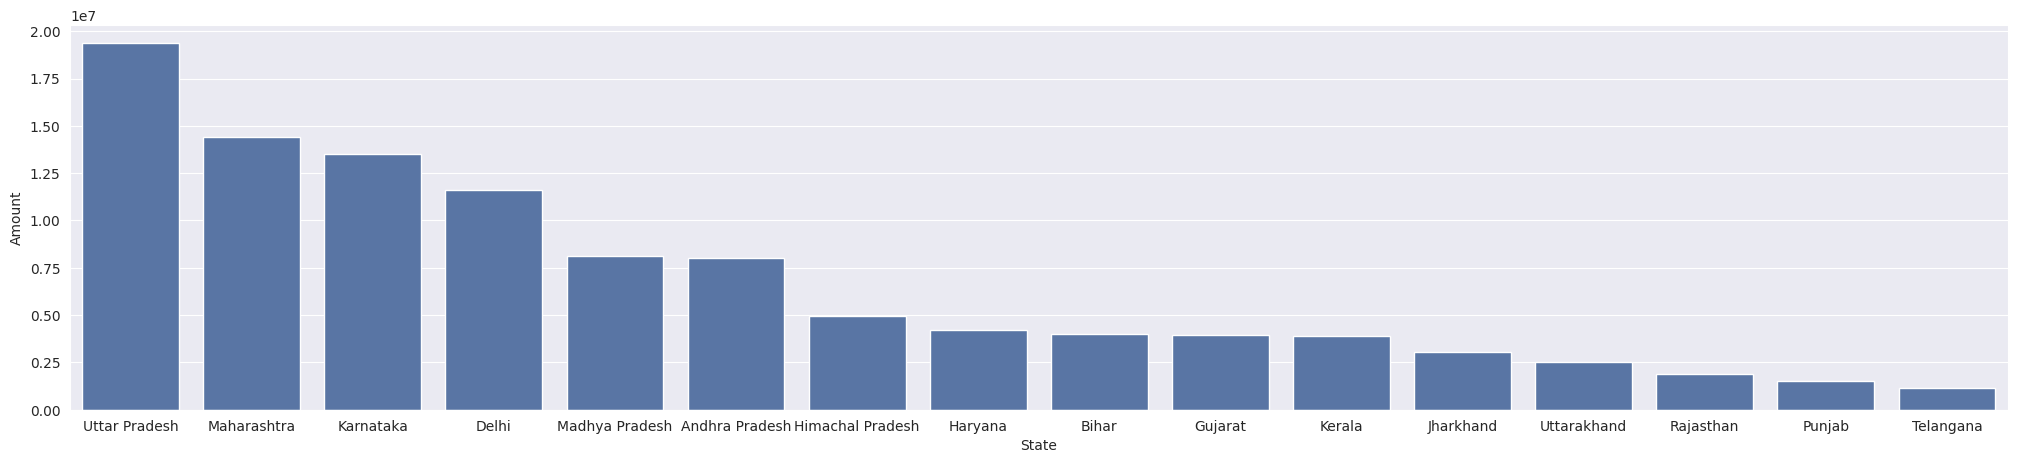

In [69]:
exp_state = dataset.groupby(['State'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set({'figure.figsize':(25,5)})
sns.barplot(x='State', y='Amount', data= exp_state)

**Marital Status**

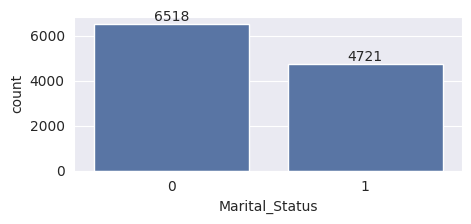

In [77]:
mx = sns.countplot(x = 'Marital_Status', data= dataset)
sns.set({'figure.figsize':(7,2)})
for bars in mx.containers:
  mx.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

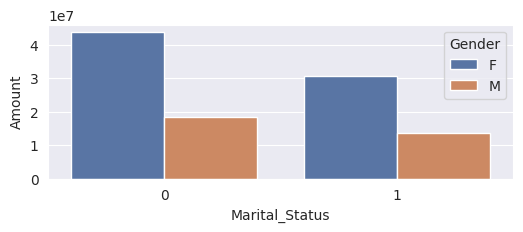

In [84]:
mar_state = dataset.groupby(['Marital_Status', 'Gender'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Marital_Status', y='Amount', hue='Gender' ,data= mar_state)

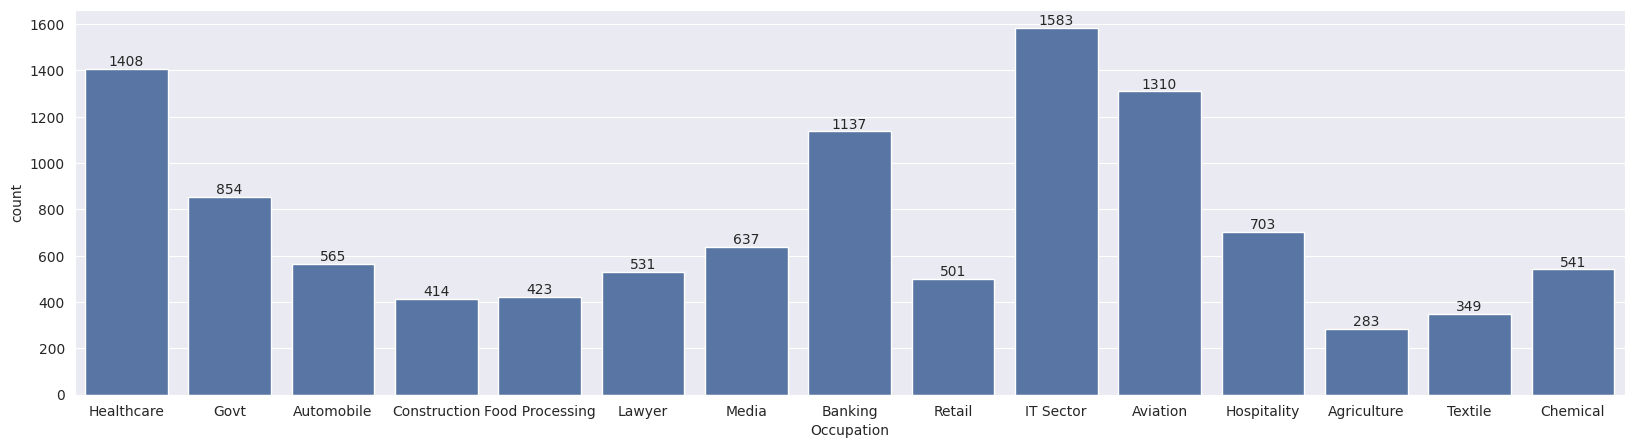

In [88]:
mx = sns.countplot(x = 'Occupation', data= dataset)
sns.set({'figure.figsize':(20,15)})
for bars in mx.containers:
  mx.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

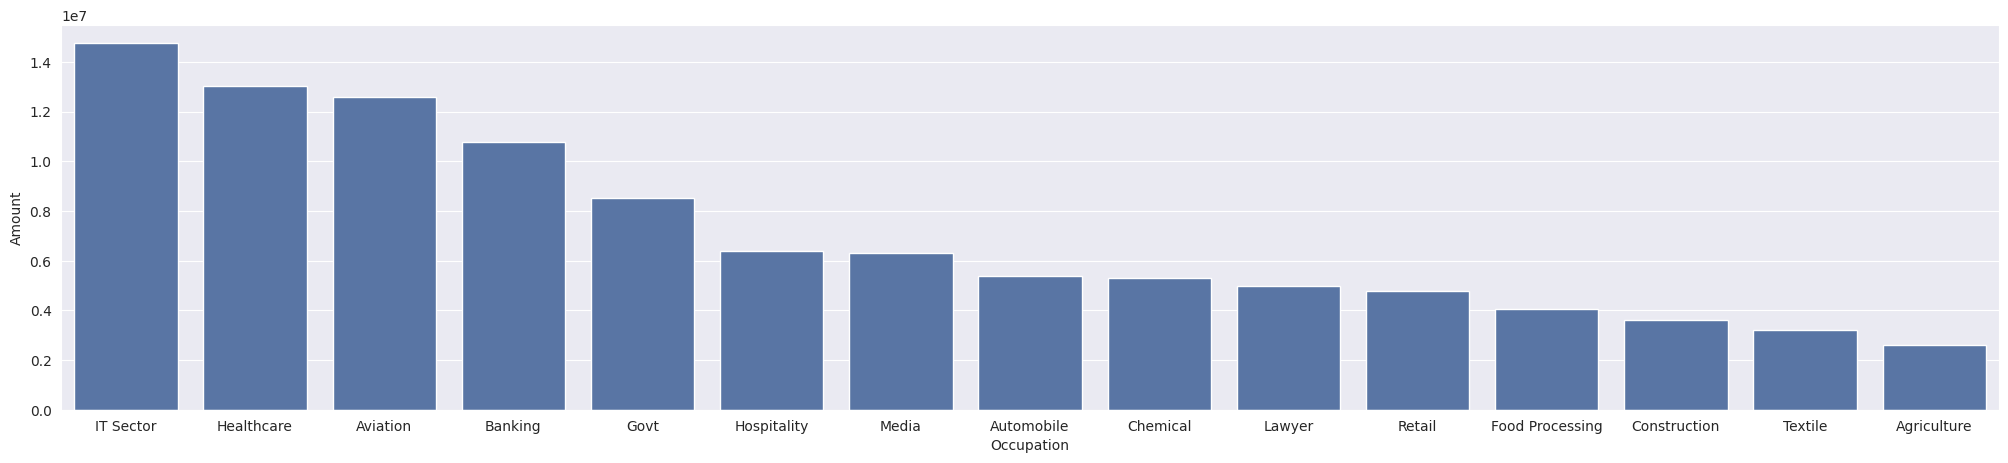

In [89]:
exp_state = dataset.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set({'figure.figsize':(25,5)})
sns.barplot(x='Occupation', y='Amount', data= exp_state)

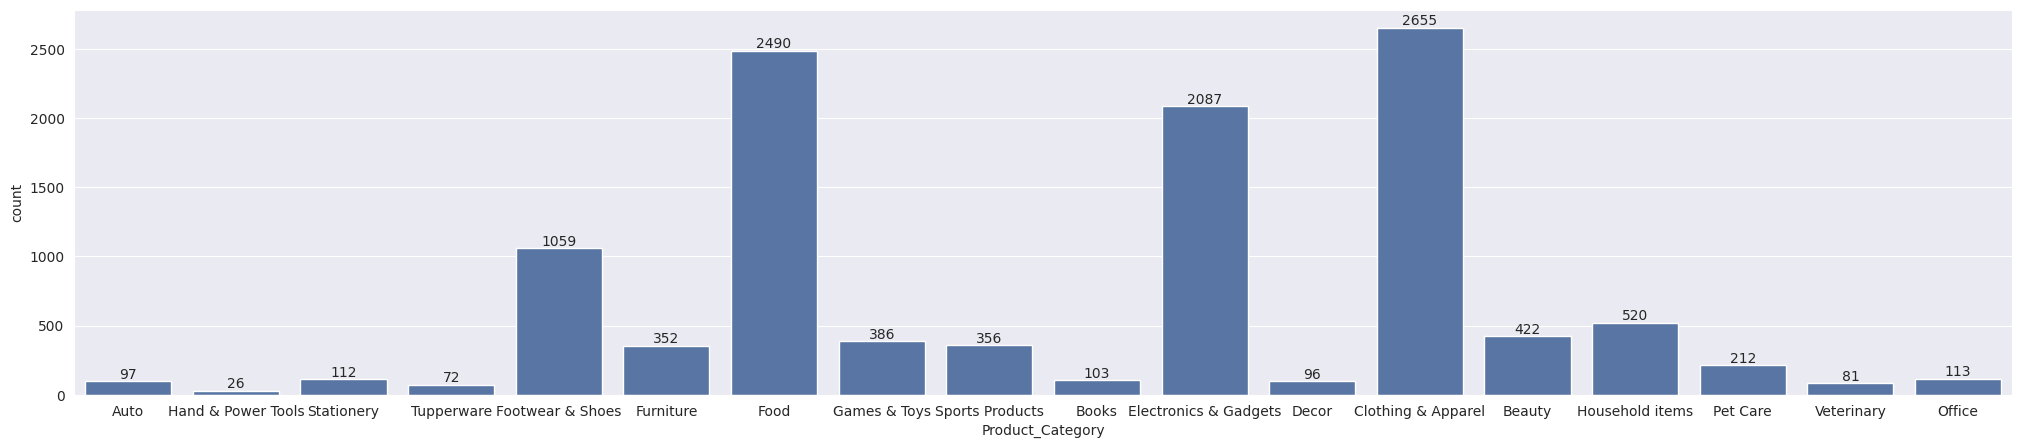

In [93]:
mx = sns.countplot(x = 'Product_Category', data= dataset)
sns.set({'figure.figsize':(20,5)})
for bars in mx.containers:
  mx.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

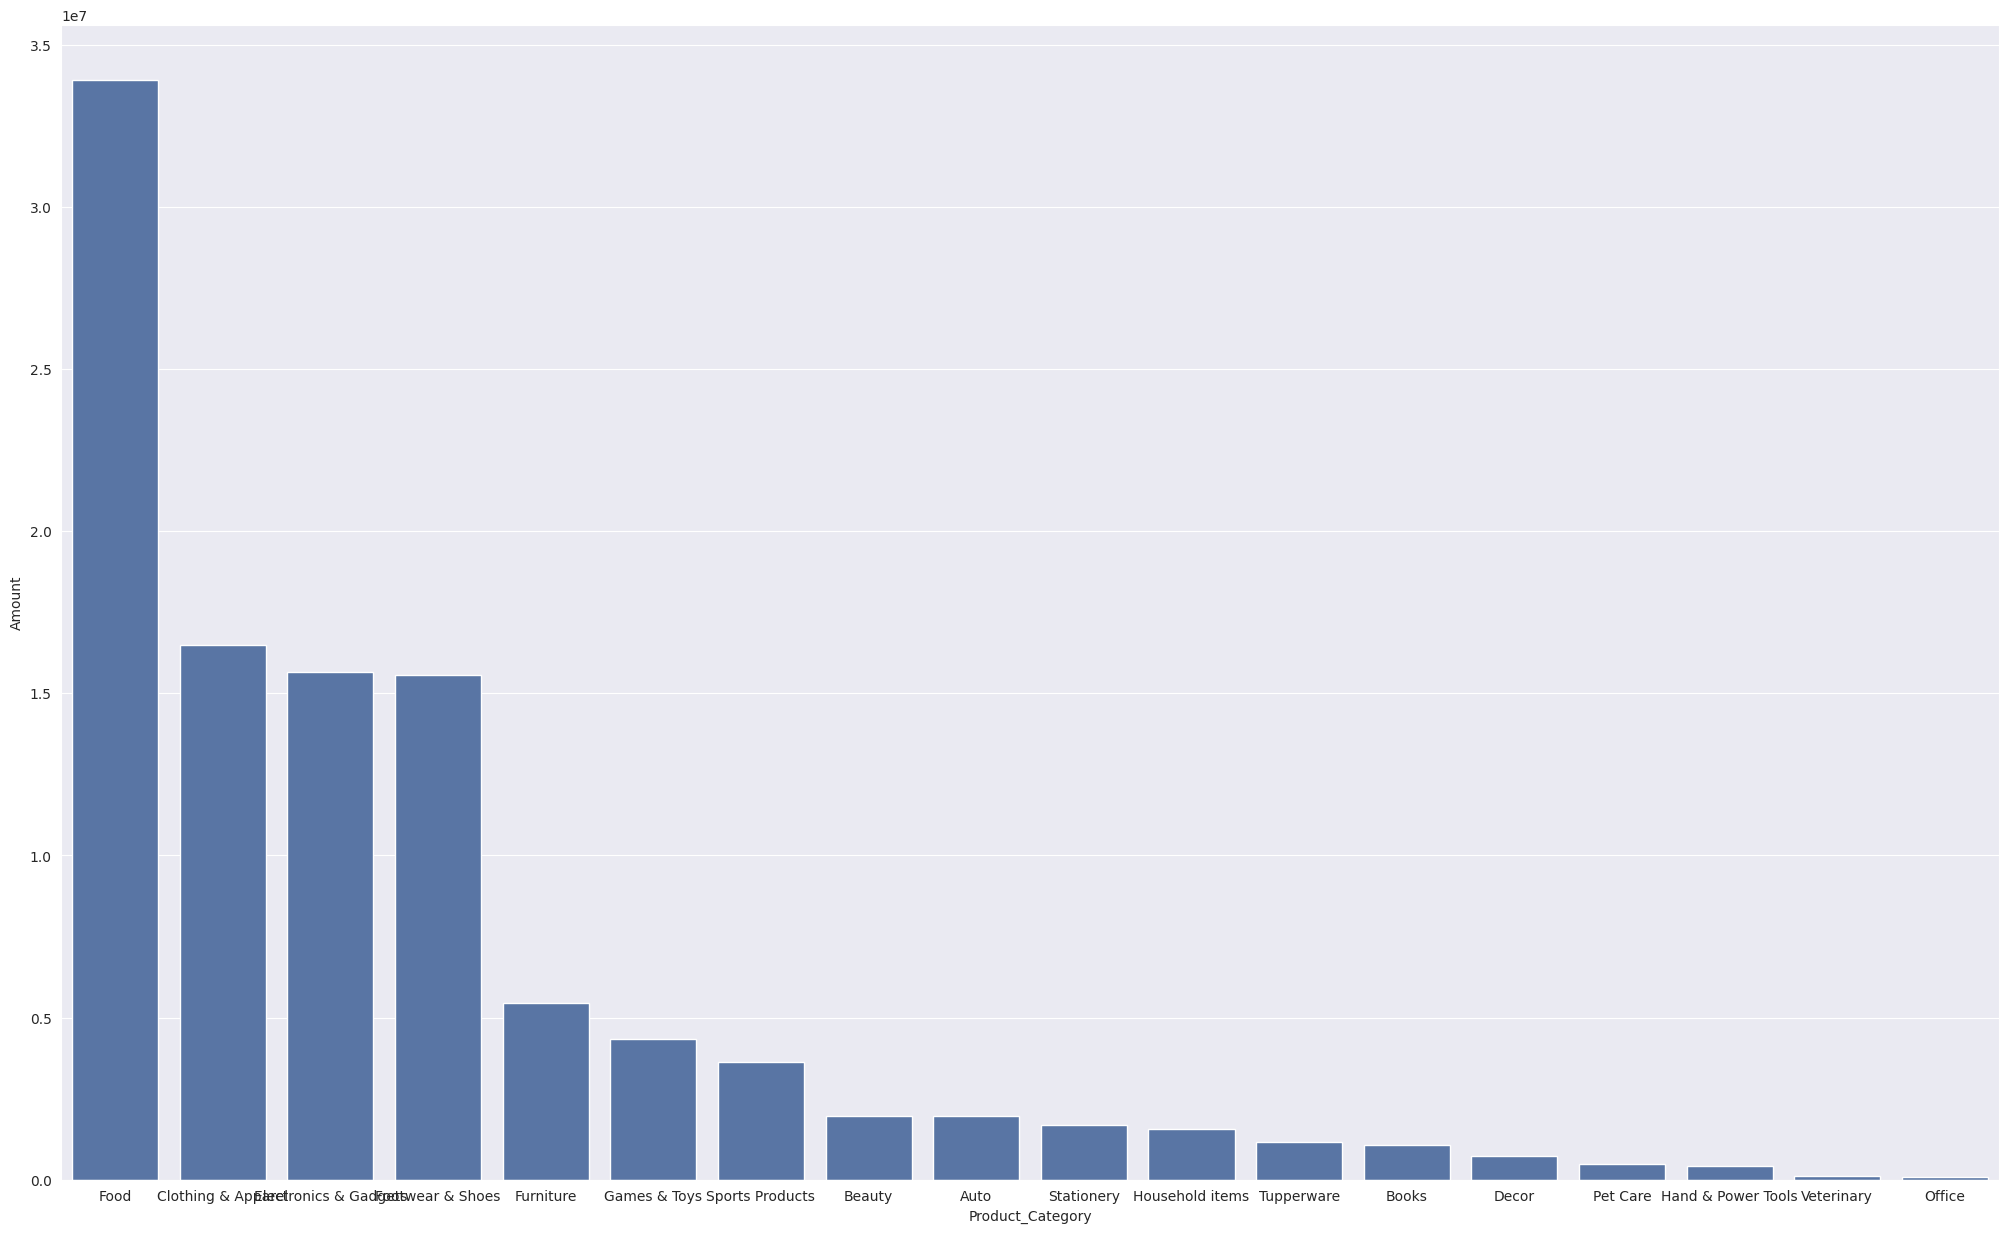

In [95]:
exp_state = dataset.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set({'figure.figsize':(25,15)})
sns.barplot(x='Product_Category', y='Amount', data= exp_state)

<Axes: xlabel='Product_ID', ylabel='Orders'>

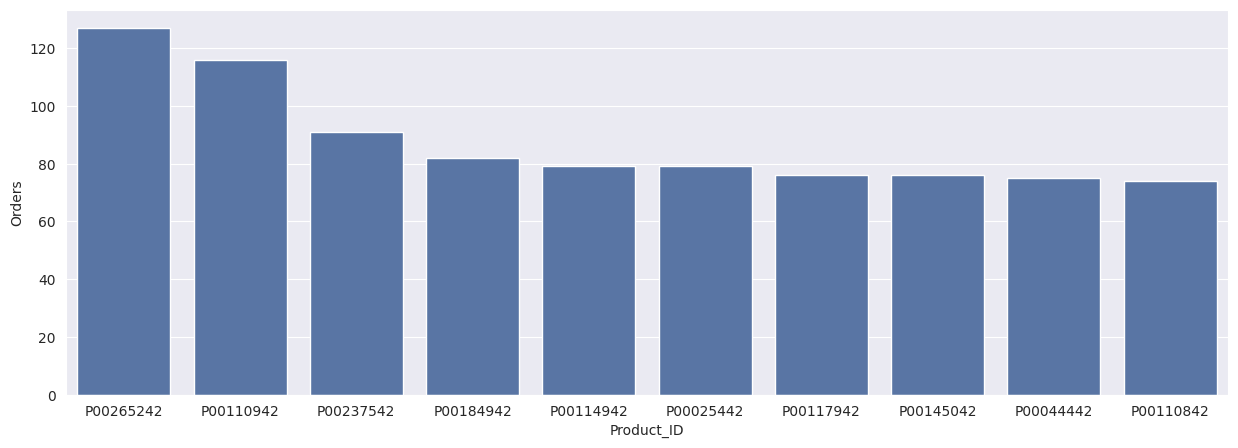

In [101]:
exp_state = dataset.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set({'figure.figsize':(15,5)})
sns.barplot(x='Product_ID', y='Orders', data= exp_state)

# **Conclusion**


Married Women between age Group of 26-35 years from Maharashtra, Uttar pradeshand Karnataka working in IT, Health care and aviation are likely to buy products from Food, Clothing and Electronics category.